In [4]:
# 📦 Install required libraries
!pip install -q transformers datasets torch accelerate
!pip install -q bitsandbytes  # optional: for efficient loading

import torch
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM
from tqdm import tqdm
import matplotlib.pyplot as plt
import os


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 12.8 MB/s eta 0:00:00


In [9]:
# 👇 Add creative prompts
prompts = [
    "In a world where dragons exist,",
    "A robot wakes up with emotions one morning.",
    "The kingdom fell into darkness when the sun vanished.",
    "A child finds a map to a hidden universe.",
    "Every mirror started reflecting the future instead of the present."
]

# ✅ Define models for comparison
model_info = {
    "tinyllama": "TinyLlama/TinyLlama-1.1B-Chat-v1.0",  # Use your HF fine-tuned model if uploaded
    "gpt2": "gpt2-medium",
    "gptneo": "EleutherAI/gpt-neo-1.3B",
    "bart": "facebook/bart-large-cnn",
}

# Output folder for stories
os.makedirs("outputs", exist_ok=True)
for m in model_info.keys():
    os.makedirs(f"outputs/{m}", exist_ok=True)


In [7]:
results = {}
generation_times = {}

for model_id, model_path in model_info.items():
    print(f"\n🧠 Loading {model_id}...")
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto", torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32)

    pipe = pipeline("text-generation", model=model, tokenizer=tokenizer)

    stories = []
    total_time = 0
    for prompt in tqdm(prompts, desc=f"Generating with {model_id}"):
        import time
        start = time.time()
        output = pipe(prompt, max_length=250, num_return_sequences=1, do_sample=True, top_p=0.95, top_k=50)
        end = time.time()
        story_text = output[0]['generated_text']
        stories.append(story_text)
        total_time += end - start

    results[model_id] = stories
    generation_times[model_id] = total_time / len(prompts)

    # Save stories to file
    with open(f"outputs/{model_id}/stories.txt", "w") as f:
        for i, story in enumerate(stories):
            f.write(f"PROMPT {i+1}: {prompts[i]}\nSTORY:\n{story}\n{'='*60}\n")



🧠 Loading tinyllama...


Device set to use cuda:0
Generating with tinyllama: 100%|██████████| 5/5 [00:50<00:00, 10.16s/it]



🧠 Loading gpt2...


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Device set to use cuda:0
Generating with gpt2:   0%|          | 0/5 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=250) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Generating with gpt2:  20%|██        | 1/5 [00:07<00:30,  7.62s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=250) seem to have been set. `max_ne


🧠 Loading gptneo...


tokenizer_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/5.31G [00:00<?, ?B/s]

Device set to use cuda:0
Generating with gptneo:   0%|          | 0/5 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=250) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Generating with gptneo:  20%|██        | 1/5 [00:10<00:40, 10.08s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=250) seem to have been set. `ma


🧠 Loading bart...


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

Device set to use cuda:0
Generating with bart: 100%|██████████| 5/5 [00:19<00:00,  3.95s/it]



🧠 Loading flan_t5...


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

ValueError: Unrecognized configuration class <class 'transformers.models.t5.configuration_t5.T5Config'> for this kind of AutoModel: AutoModelForCausalLM.
Model type should be one of AriaTextConfig, BambaConfig, BartConfig, BertConfig, BertGenerationConfig, BigBirdConfig, BigBirdPegasusConfig, BioGptConfig, BitNetConfig, BlenderbotConfig, BlenderbotSmallConfig, BloomConfig, CamembertConfig, LlamaConfig, CodeGenConfig, CohereConfig, Cohere2Config, CpmAntConfig, CTRLConfig, Data2VecTextConfig, DbrxConfig, DeepseekV3Config, DiffLlamaConfig, ElectraConfig, Emu3Config, ErnieConfig, FalconConfig, FalconMambaConfig, FuyuConfig, GemmaConfig, Gemma2Config, Gemma3Config, Gemma3TextConfig, GitConfig, GlmConfig, Glm4Config, GotOcr2Config, GPT2Config, GPT2Config, GPTBigCodeConfig, GPTNeoConfig, GPTNeoXConfig, GPTNeoXJapaneseConfig, GPTJConfig, GraniteConfig, GraniteMoeConfig, GraniteMoeHybridConfig, GraniteMoeSharedConfig, HeliumConfig, JambaConfig, JetMoeConfig, LlamaConfig, Llama4Config, Llama4TextConfig, MambaConfig, Mamba2Config, MarianConfig, MBartConfig, MegaConfig, MegatronBertConfig, MistralConfig, MixtralConfig, MllamaConfig, MoshiConfig, MptConfig, MusicgenConfig, MusicgenMelodyConfig, MvpConfig, NemotronConfig, OlmoConfig, Olmo2Config, OlmoeConfig, OpenLlamaConfig, OpenAIGPTConfig, OPTConfig, PegasusConfig, PersimmonConfig, PhiConfig, Phi3Config, Phi4MultimodalConfig, PhimoeConfig, PLBartConfig, ProphetNetConfig, QDQBertConfig, Qwen2Config, Qwen2MoeConfig, Qwen3Config, Qwen3MoeConfig, RecurrentGemmaConfig, ReformerConfig, RemBertConfig, RobertaConfig, RobertaPreLayerNormConfig, RoCBertConfig, RoFormerConfig, RwkvConfig, Speech2Text2Config, StableLmConfig, Starcoder2Config, TransfoXLConfig, TrOCRConfig, WhisperConfig, XGLMConfig, XLMConfig, XLMProphetNetConfig, XLMRobertaConfig, XLMRobertaXLConfig, XLNetConfig, XmodConfig, ZambaConfig, Zamba2Config.

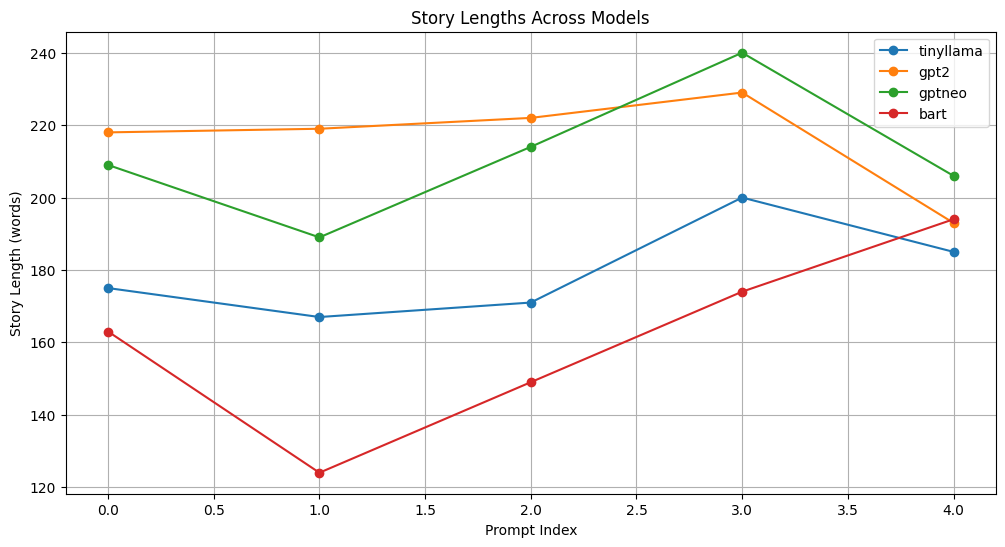

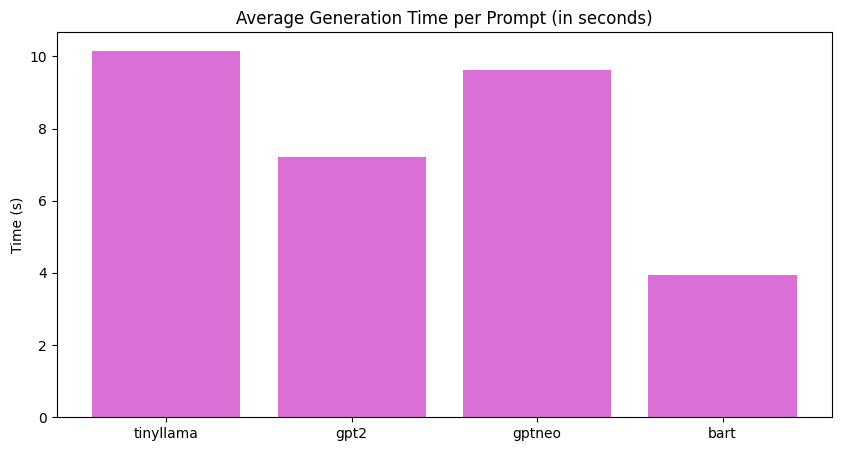

In [10]:
# 📏 Story lengths
story_lengths = {model: [len(s.split()) for s in stories] for model, stories in results.items()}

# 🔢 Plot story length comparison
plt.figure(figsize=(12, 6))
for model in model_info.keys():
    plt.plot(story_lengths[model], marker='o', label=model)
plt.title("Story Lengths Across Models")
plt.xlabel("Prompt Index")
plt.ylabel("Story Length (words)")
plt.legend()
plt.grid(True)
plt.show()

# ⏱️ Average generation time per model
plt.figure(figsize=(10, 5))
plt.bar(generation_times.keys(), generation_times.values(), color='orchid')
plt.title("Average Generation Time per Prompt (in seconds)")
plt.ylabel("Time (s)")
plt.show()


In [11]:
# Just a formatted Markdown table to copy into your report
from IPython.display import Markdown

def generate_eval_table():
    table = "| Model | Prompt | Story Start | Length | Human Creativity Score (1–5) |\n"
    table += "|-------|--------|-------------|--------|-------------------------------|\n"
    for model in results:
        for i, story in enumerate(results[model]):
            table += f"| {model} | {i+1} | {story[:60]}... | {len(story.split())} |     |\n"
    return table

Markdown(generate_eval_table())


| Model | Prompt | Story Start | Length | Human Creativity Score (1–5) |
|-------|--------|-------------|--------|-------------------------------|
| tinyllama | 1 | In a world where dragons exist, the village of Lumbridge is ... | 175 |     |
| tinyllama | 2 | A robot wakes up with emotions one morning.
A robot wakes up... | 167 |     |
| tinyllama | 3 | The kingdom fell into darkness when the sun vanished.

II. T... | 171 |     |
| tinyllama | 4 | A child finds a map to a hidden universe. B A child sees a w... | 200 |     |
| tinyllama | 5 | Every mirror started reflecting the future instead of the pr... | 185 |     |
| gpt2 | 1 | In a world where dragons exist, there is no way to fight the... | 218 |     |
| gpt2 | 2 | A robot wakes up with emotions one morning. It can't remembe... | 219 |     |
| gpt2 | 3 | The kingdom fell into darkness when the sun vanished. Then t... | 222 |     |
| gpt2 | 4 | A child finds a map to a hidden universe.

The child finds a... | 229 |     |
| gpt2 | 5 | Every mirror started reflecting the future instead of the pr... | 193 |     |
| gptneo | 1 | In a world where dragons exist, the legendary hero Takhisis ... | 209 |     |
| gptneo | 2 | A robot wakes up with emotions one morning. They are not joy... | 189 |     |
| gptneo | 3 | The kingdom fell into darkness when the sun vanished.

The e... | 214 |     |
| gptneo | 4 | A child finds a map to a hidden universe. A child discovers ... | 240 |     |
| gptneo | 5 | Every mirror started reflecting the future instead of the pr... | 206 |     |
| bart | 1 | In a world where dragons exist, ItAfterAfterAfterJAfterAfter... | 163 |     |
| bart | 2 | A robot wakes up with emotions one morning.Sheasasasoneasas ... | 124 |     |
| bart | 3 | The kingdom fell into darkness when the sun vanished. SAfter... | 149 |     |
| bart | 4 | A child finds a map to a hidden universe.adaadaada EdgeDeAsA... | 174 |     |
| bart | 5 | Every mirror started reflecting the future instead of the pr... | 194 |     |


In [13]:
from IPython.display import display, HTML

def visualize_stories(results_dict, prompts):
    html_content = """
    <style>
        .story-block {
            background: #f8f8f8;
            border-radius: 12px;
            padding: 16px;
            margin: 12px 0;
            font-family: 'Segoe UI', sans-serif;
            box-shadow: 2px 2px 8px rgba(0,0,0,0.05);
        }
        .prompt {
            font-weight: bold;
            color: #6a1b9a;
            margin-bottom: 6px;
        }
        .model-name {
            font-size: 18px;
            font-weight: bold;
            color: #2e7d32;
            margin-top: 24px;
            border-bottom: 2px solid #ccc;
            padding-bottom: 4px;
        }
        .story {
            white-space: pre-wrap;
            line-height: 1.6;
            color: #333;
        }
    </style>
    """

    for model, stories in results_dict.items():
        html_content += f'<div class="model-name">{model.upper()}</div>'
        for i, story in enumerate(stories):
            html_content += f'''
                <div class="story-block">
                    <div class="prompt">Prompt {i+1}: {prompts[i]}</div>
                    <div class="story" >{story}</div>
                </div>
            '''

    display(HTML(html_content))

# 🔍 Run visualization
visualize_stories(results, prompts)
